In [1]:
%pylab inline
import pygadgetreader
import reading_snapshots
import gadget

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


In [3]:
r_s_sims = 40.85

In [4]:
MW_mass = pygadgetreader.readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'mass', 'dm')

Returning DM    Mass


In [5]:
MW_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential
Loading MW particles and LMC particles


In [25]:
MW_post[2][index_300]

array([-65290.637, -65466.29 , -65262.42 , ..., -78058.836, -78207.67 ,
       -78464.63 ], dtype=float32)

In [15]:
dist_mwmlmc = (MW_post[0][:,0]**2 + MW_post[0][:,2]**2 +MW_post[0][:,1]**2)**0.5

In [16]:
index_300 = np.where(dist_mwmlmc<300)

In [17]:
MW_post_300 = MW_post[0][index_300]

In [18]:
shape(MW_post_300)

(77615338, 3)

In [19]:
N_random_1e6 = np.random.randint(0, 77615338, 1000000)


In [6]:
N_random_1e5 = np.random.randint(0, 10**8, 100000)
N_random_1e6 = np.random.randint(0, 10**8, 1000000)
N_random_1e7 = np.random.randint(0, 10**8, 10000000)

In [56]:
ics.pos[:] = MW_post[0]
ics.vel[:] = MW_post[1]
ics.mass[:] = np.ones(100000000)*MW_mass[0]
#ics.ParticleIDs[:] = MW_post[3]
ics.write()

In [68]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e6.hdf5", [0,10**6], verbose=True)
ics.pos[:] = MW_post[0][N_random_1e6]
ics.vel[:] = MW_post[1][N_random_1e6]
ics.mass[:] = np.ones(1000000)*MW_mass[0]
ics.ParticleIDs[:]=np.arange(1, 10**6+1)
ics.write()

In [74]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e7.hdf5", [0,10**7], verbose=True, longids=True)
ics.pos[:] = MW_post[0][N_random_1e7]
ics.vel[:] = MW_post[1][N_random_1e7]
ics.mass[:] = np.ones(10000000)*MW_mass[0]
ics.ParticleIDs[:] = np.arange(1, 10**7+1)
ics.write()

In [75]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e5.hdf5", [0,10**5], verbose=True, longids=True)
ics.pos[:] = MW_post[0][N_random_1e5]
ics.vel[:] = MW_post[1][N_random_1e5]
ics.mass[:] = np.ones(100000)*MW_mass[0]
ics.ParticleIDs[:] = np.arange(1, 10**5+1)
ics.write()

In [57]:
!du -h MWLMC5_100M_b1_dmhalopart.hdf5 

3.4G	MWLMC5_100M_b1_dmhalopart.hdf5


In [4]:
MWLMC_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/',
                                                            'MW2_100M_beta1_vir_017', LMC=False,
                                                             N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential


In [9]:
r_mw = (MWLMC_post[0][:,0]**2 + MWLMC_post[0][:,1]**2 + MWLMC_post[0][:,2]**2)**0.5
index_cut = np.where(r_mw < 300)[0]

In [10]:
ics_MW = gadget.ICs("MW_100M_b1_dmhalopart_1e8.hdf5", [0,10**8], verbose=True, longids=True)
ics_MW.pos[:] = MWLMC_post[0]
ics_MW.vel[:] = MWLMC_post[1]
ics_MW.mass[:] = np.ones(10**8)*MW_mass[0]
ics_MW.ParticleIDs[:] = np.arange(1, 10**8+1)
ics_MW.write()

In [7]:
N_random_1e5 = np.random.randint(0, 10**8, 100000)
N_random_1e6 = np.random.randint(0, 10**8, 1000000)
N_random_1e7 = np.random.randint(0, 10**8, 10000000)

In [28]:
def write_snap(pos, vel, mass, lenght_data, name):
    ics_MW = gadget.ICs(name, [0,lenght_data], verbose=True, longids=True)
    ics_MW.pos[:] = pos
    ics_MW.vel[:] = vel
    ics_MW.mass[:] = mass
    ics_MW.ParticleIDs[:] = np.arange(1, lenght_data+1)
    ics_MW.write()
    print('Done Writting Snapshot')
    return 0

In [19]:
write_snap(MWLMC_post[0][N_random_1e7], MWLMC_post[1][N_random_1e7],  np.ones(10**7)*MW_mass[0], 10**7, 'MW_100M_b1_dmhalopart_1e7.hdf5')

Done Writting Snapshot


0

In [42]:
N_random_1e6 = np.random.randint(0, 1E6, 1000000)


In [43]:
MW_post[0][N_random_1e6]

array([[-2.7564194e+03,  1.0974772e+03, -4.3845029e+03],
       [-2.3102100e+01, -1.9384148e+01, -3.5307861e+01],
       [-4.5854435e+00, -1.6682203e+01, -7.7312149e+01],
       ...,
       [-2.1187592e+04,  1.6292242e+04, -1.4542681e+04],
       [-1.2032610e+01, -3.1679783e+01, -1.0824390e+01],
       [-7.7160835e+00, -1.5820648e+01, -8.2395226e+01]], dtype=float32)

In [46]:
MW_mass[0]

1.5772125e-06

In [44]:
write_snap(MW_post[0][N_random_1e6], MW_post[1][N_random_1e6],  np.ones(10**6)*MW_mass[0], 10**6, 'MW_100M_b1_dmhalopart_1e6.hdf5')

Done Writting Snapshot


0

In [21]:
write_snap(MWLMC_post[0][N_random_1e5], MWLMC_post[1][N_random_1e5],  np.ones(10**5)*MW_mass[0], 10**5, 'MW_100M_b1_dmhalopart_1e5.hdf5')

Done Writting Snapshot


0

(-30, 30)

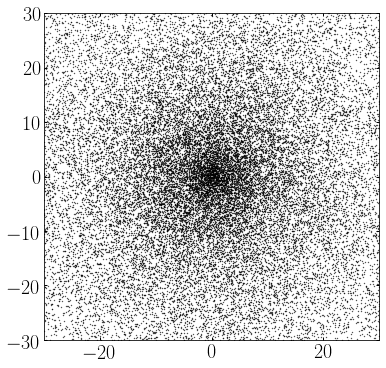

In [29]:
figure(figsize=(6,6))
scatter(MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], s=0.1, c='k')
xlim(-30, 30)
ylim(-30, 30)

(array([ 1000632.,  1000857.,  1000230.,  1000617.,   999696.,   998192.,
         1002289.,   999972.,   999754.,   997761.]),
 array([  3.00000000e+00,   1.00000025e+07,   2.00000020e+07,
          3.00000015e+07,   4.00000010e+07,   5.00000005e+07,
          6.00000000e+07,   6.99999995e+07,   7.99999990e+07,
          8.99999985e+07,   9.99999980e+07]),
 <a list of 10 Patch objects>)

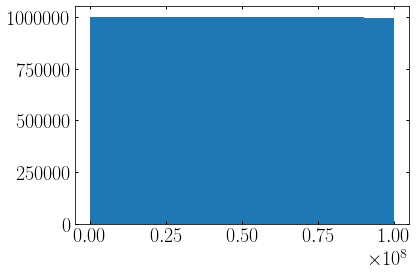

In [35]:
hist(N_random_1e7)

In [44]:
np.savetxt('MW_100M_b1_dm_part_1e8.txt', np.array([MWLMC_post[0][:,0], MWLMC_post[0][:,1], MWLMC_post[0][:,2], MW_mass[0]*np.ones(10**8)]).T)

In [20]:
#np.savetxt('MW_100M_b1_dm_part_1e7.txt', np.array([MW_post[0][N_random_1e7,0], MW_post[0][N_random_1e7,1], MW_post[0][N_random_1e7,2], MW_mass[0]*np.ones(10**7)]).T)
np.savetxt('MW_100M_b1_dm_part_1e6_300.txt', np.array([MW_post_300[N_random_1e6,0], MW_post_300[N_random_1e6,1], MW_post_300[N_random_1e6,2], MW_mass[0]*np.ones(10**6)]).T)
#np.savetxt('MW_100M_b1_dm_part_1e5.txt', np.array([MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], MWLMC_post[0][N_random_1e5,2], MW_mass[0]*np.ones(10**5)]).T)

In [25]:
d

100000000

N_random_1e5 = np.random.randint(0, 10**8, 100000)

N_random_1e6 = np.random.randint(0, 10**8, 1000000)

N_random_1e7 = np.random.randint(0, 10**8, 10000000)

ics.pos[:] = MW_post[0]

ics.vel[:] = MW_post[1]

ics.mass[:] = np.ones(100000000)*MW_mass[0]

#ics.ParticleIDs[:] = MW_post[3]

ics.write()

ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e6.hdf5", [0,10**6], verbose=True)

ics.pos[:] = MW_post[0][N_random_1e6]

ics.vel[:] = MW_post[1][N_random_1e6]

ics.mass[:] = np.ones(1000000)*MW_mass[0]

ics.ParticleIDs[:]=np.arange(1, 10**6+1)

ics.write()

ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e7.hdf5", [0,10**7], verbose=True, longids=True)

ics.pos[:] = MW_post[0][N_random_1e7]

ics.vel[:] = MW_post[1][N_random_1e7]

ics.mass[:] = np.ones(10000000)*MW_mass[0]

ics.ParticleIDs[:] = np.arange(1, 10**7+1)

ics.write()

ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e5.hdf5", [0,10**5], verbose=True, longids=True)

ics.pos[:] = MW_post[0][N_random_1e5]

ics.vel[:] = MW_post[1][N_random_1e5]

ics.mass[:] = np.ones(100000)*MW_mass[0]

ics.ParticleIDs[:] = np.arange(1, 10**5+1)

ics.write()

!du -h MWLMC5_100M_b1_dmhalopart.hdf5 

3.4G	MWLMC5_100M_b1_dmhalopart.hdf5

MWLMC_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/',

                                                            'MW2_100M_beta1_vir_017', LMC=False,

                                                             N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential

r_mw = (MWLMC_post[0][:,0]**2 + MWLMC_post[0][:,1]**2 + MWLMC_post[0][:,2]**2)**0.5

index_cut = np.where(r_mw < 300)[0]

ics_MW = gadget.ICs("MW_100M_b1_dmhalopart_1e8.hdf5", [0,10**8], verbose=True, longids=True)

ics_MW.pos[:] = MWLMC_post[0]

ics_MW.vel[:] = MWLMC_post[1]

ics_MW.mass[:] = np.ones(10**8)*MW_mass[0]

ics_MW.ParticleIDs[:] = np.arange(1, 10**8+1)

ics_MW.write()

N_random_1e5 = np.random.randint(0, 10**8, 100000)

N_random_1e6 = np.random.randint(0, 10**8, 1000000)

N_random_1e7 = np.random.randint(0, 10**8, 10000000)

def write_snap(pos, vel, mass, lenght_data, name):

    ics_MW = gadget.ICs(name, [0,lenght_data], verbose=True, longids=True)

    ics_MW.pos[:] = pos

    ics_MW.vel[:] = vel

    ics_MW.mass[:] = mass

    ics_MW.ParticleIDs[:] = np.arange(1, lenght_data+1)

    ics_MW.write()

    print('Done Writting Snapshot')

    return 0

write_snap(MWLMC_post[0][N_random_1e7], MWLMC_post[1][N_random_1e7],  np.ones(10**7)*MW_mass[0], 10**7, 'MW_100M_b1_dmhalopart_1e7.hdf5')

Done Writting Snapshot

0

N_random_1e6 = np.random.randint(0, len(index_cut), 1000000)

​

write_snap(MWLMC_post[0][index_cut][N_random_1e6], MWLMC_post[1][index_cut][N_random_1e6],  np.ones(10**6)*MW_mass[0], 10**6, 'MW_100M_b1_dmhalopart_1e6_tr.hdf5')

Done Writting Snapshot

0

write_snap(MWLMC_post[0][N_random_1e5], MWLMC_post[1][N_random_1e5],  np.ones(10**5)*MW_mass[0], 10**5, 'MW_100M_b1_dmhalopart_1e5.hdf5')

Done Writting Snapshot

0

figure(figsize=(6,6))

scatter(MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], s=0.1, c='k')

xlim(-30, 30)

ylim(-30, 30)

(-30, 30)

np.savetxt('MW_100M_b1_dm_part_1e8.txt', np.array([MWLMC_post[0][:,0], MWLMC_post[0][:,1], MWLMC_post[0][:,2], MW_mass[0]*np.ones(10**8)]).T)

np.savetxt('MW_100M_b1_dm_part_1e7.txt', np.array([MW_post[0][N_random_1e7,0], MW_post[0][N_random_1e7,1], MW_post[0][N_random_1e7,2], MW_mass[0]*np.ones(10**7)]).T)

#np.savetxt('MW_100M_b1_dm_part_1e6.txt', np.array([MW_post[0][N_random_1e6,0], MW_post[0][N_random_1e6,1], MW_post[0][N_random_1e6,2], MW_mass[0]*np.ones(10**6)]).T)

#np.savetxt('MW_100M_b1_dm_part_1e5.txt', np.array([MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], MWLMC_post[0][N_random_1e5,2], MW_mass[0]*np.ones(10**5)]).T)

xt('MW_100M_b1_dm_part_1e7.txt')

In [26]:
shape(data_test)

(10000000, 4)

In [27]:
xtest = data_test[:,0]
ytest = data_test[:,1]
ztest = data_test[:,2]

In [28]:
len(xtest)

10000000

In [29]:
N_random_1e5 = np.random.randint(0, 10**7, 100000)


(-20, 20)

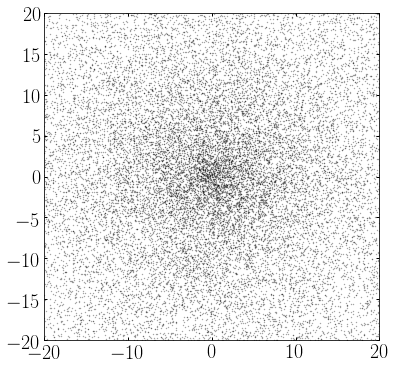

In [30]:
figure(figsize=(6,6))
scatter(xtest[N_random_1e5], ztest[N_random_1e5], c='k', s=0.1, alpha=0.5)
xlim(-20, 20)
ylim(-20, 20)